In [10]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import json
from sklearn import datasets
import seaborn as sns
import datetime
%matplotlib inline


In [11]:
df = pd.read_csv("us_revenue filtered 03.02-07.02.csv", sep=",")

In [12]:
#Парсим столбец с Json структурой и добавляем полученные столбцы в конец нашей таблицы
data = df['event_json']
data = [json.loads(row) for row in data]
df1 = pd.json_normalize(data)
del df['event_json']    
df = pd.concat([df,df1], axis = 1)


In [13]:
#Средний eCPM по Видам рекламы
df1 = df.groupby(['ad_type']).agg({'revenue': ['mean']})
df1.columns = ['eCPM']
df1.eCPM = df1.eCPM*1000
df1

,eCPM
ad_type,
banner,0.744113
int,36.209634
rv,65.051165


In [14]:
'''Средний eCPM по Видам рекламы/Городам/Версиям OS
Если считать доход от единичного показа рекламы при заданных условиях (Вид рекламы/Город/Версия OS) дискретной случайной
величиной, то как правило достаточно 30 испытаний, чтобы достаточно достоверно оценить ее матожидание, поэтому мы не будем
учитывать группы с недостаточным количеством событий
'''
#Фильтруем группы по количеству записей
df1 = df.groupby(['ad_type','city','os_version']).filter(lambda g: len(g)>=30)
#Повторно группируем и считаем средний доход за показ рекламы 
df1 = df1.groupby(['ad_type','city','os_version']).agg({'revenue': ['mean','count']})
df1.columns = ['eCPM','Count']
df1.eCPM = df1.eCPM*1000
df2 = df1.sort_values(by = "eCPM")
#Заметим, что самый большой доход идет с показа рекламы на устройствах с последей версией OС, это касается всех 3 типов рекламы

df2

eCPM  Count
ad_type city          os_version                   
banner  Rockford      11            0.012581    340
        Canonsburg    12            0.029317    445
        Livonia       7.1.2         0.032918    231
        Malden        11            0.037929   2293
        Vista         12            0.040451   1270
...                                      ...    ...
rv      Oklahoma City 12          139.177701     49
        Houston       12          148.875596     60
int     Bangor        12          150.217674     48
rv      Indianapolis  12          159.757107     32
int     Rocky Mount   12          227.190990     41

[1308 rows x 2 columns]

In [15]:
#Суммарные доходы по городам, версиям ОС
df1 = df.groupby(['ad_type','city','os_version']).agg({'revenue': ['sum','count']})
df1.columns = ['Sum','Count']
df2 = df1.sort_values(by = "Sum")

df2

Sum  Count
ad_type city         os_version                  
banner  Anderson     12           0.000031      1
        Rapid City   11           0.000033      1
        Waukesha     11           0.000045      1
        San Jose     10           0.000048      1
        Federal Way  11           0.000055      1
...                                    ...    ...
int     Houston      12           9.001495    250
        Cincinnati   12           9.162854    115
        Rocky Mount  12           9.314831     41
        New York     12          12.599601    208
        Indianapolis 12          17.084834    215

[3479 rows x 2 columns]

In [20]:
#Распределение eCPM по локализациям
df1 = df.groupby(['ad_type', 'device_locale']).agg({'revenue': ['mean','count']})
df1.columns = ['mean','Count']
df1['mean']=df1['mean']*1000
df2 = df1.sort_values(['ad_type', 'mean'])
df2
#Заметим, что больше всего на баннерной рекламе зарабатывают на канадских локализациях, дальше идет США, а меньше всего на Индийской
# и британской, тоже касается и для рекламы типа int, но тут данных меньше для всех локализаций кроме США, поэтому и меньше
# уверенности в точности аналитики

mean   Count
ad_type device_locale                   
banner  en_NL           0.133908     417
        en_GB           0.159654    1411
        fr_FR           0.204309      37
        zh-Hant_TW      0.245504      37
        en_IN           0.294887     848
        en_AU           0.618522      15
        en_US           0.744943  812405
        ko_KR           0.756196     134
        en_CA           1.956659     680
int     en_NL          14.384561      21
        fr_FR          16.390000       2
        en_GB          19.791569     116
        zh-Hant_TW     23.160000       4
        en_IN          31.022423      24
        en_US          36.259830   37397
        ko_KR          40.231941      13
        en_AU          47.866001       2
        en_CA          54.632542      34
rv      fr_FR           5.190000       4
        en_GB          31.013363      16
        en_IN          39.861714       3
        en_CA          50.702898       4
        en_US          65.193227    6455

In [17]:
#Распределение eCPM по версии OC
df1 = df.groupby(['ad_type', 'os_version']).agg({'revenue': ['mean','count']})
df1.columns = ['mean','Count']
df1['mean']=df1['mean']*1000
df2 = df1.sort_values(['ad_type', 'mean'])
df2
#Заметим что для всех типов рекламы eCPM растет вместе с версией ОС
#Это особенно заметно если смотреть на разницу eCPM между последней и предпоследней версиями ОС

mean   Count
ad_type os_version                   
banner  7.1.2        0.144868    1741
        5.0.2        0.198288     685
        7.1.1        0.236141    1271
        6.0.1        0.254481     656
        7.0          0.278132    3832
        8.1.0        0.320697    8880
        8.0.0        0.368201    7618
        9            0.549553   63361
        10           0.591274  143762
        11           0.592766  196196
        12           0.936871  387982
int     7.1.2       11.964031      70
        6.0.1       13.172003      44
        5.0.2       14.969333      22
        8.1.0       17.694561     340
        7.1.1       18.232767      66
        8.0.0       20.030134     338
        9           27.004733    2906
        10          31.216643    6144
        11          33.468471   10865
        7.0         39.266162     199
        12          42.391070   16619
rv      6.0.1        9.191038       4
        5.0.2       14.188713       2
        7.1.1       24.215299       5
        8.1.0       31.830249      29
        8.0.0       38.614653      60
        9           50.151552     395
        10          53.336882     965
        11          53.378872    2010
        12          79.568911    2986
        7.0         79.662468      26

In [18]:
#Распределение eCPM по дням
def onlydate(dt):
    return dt.date()
df['event_datetime'] = pd.to_datetime(df['event_datetime'], format="%Y/%m/%d")
df.event_datetime = df.event_datetime.apply(onlydate)

df1 = df.groupby(['ad_type', 'event_datetime']).agg({'revenue': ['mean','count']})
df1.columns = ['mean','Count']
df1['mean']=df1['mean']*1000
df2 = df1.sort_values(['ad_type', 'event_datetime'])
df2
#Заметим что 03.02.2022(четверг) eCPM для всех видов рекламы значительно выше чем для других дней, и дальше плавно падает до конца недели


mean   Count
ad_type event_datetime                    
banner  2022-01-29        1.657232       5
        2022-01-30        0.543451      22
        2022-01-31        1.027394      39
        2022-02-01        0.823628     126
        2022-02-02        1.441148     327
        2022-02-03        1.209911   60508
        2022-02-04        0.812683  116295
        2022-02-05        0.777230  204058
        2022-02-06        0.689660  245559
        2022-02-07        0.586508  189045
int     2022-01-29       12.451473       1
        2022-01-30       27.981617       3
        2022-01-31       23.900685       4
        2022-02-01       42.050735      14
        2022-02-02       27.630641      47
        2022-02-03       50.884991    2497
        2022-02-04       42.531105    6101
        2022-02-05       37.711426    9858
        2022-02-06       32.180168   10725
        2022-02-07       30.663635    8363
rv      2022-01-30      130.000000       1
        2022-02-01      112.179675       3
        2022-02-02       49.247379       4
        2022-02-03       90.551469     449
        2022-02-04       67.934184    1099
        2022-02-05       69.683705    1467
        2022-02-06       60.361314    1908
        2022-02-07       56.921640    1551

6357

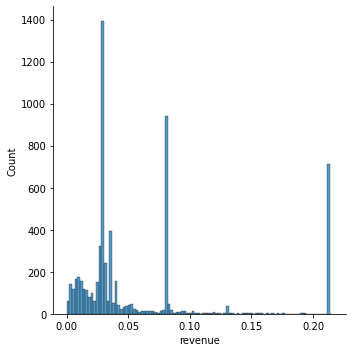

In [19]:
#Распределение дохода с рекламы типа int
df1 = df[df.ad_type =="int"]
m = df1.revenue.mean()
s = df1.revenue.var()**(0.5)
#Убираем сильные выбросы
data1 = df1[abs(df1.revenue-m)<2*s].revenue
sns.displot(data1, bins=100)
len(data1)